# Cian McInerney - 17232724 - Etivity 2: Data Preparation 



**Etivity Tasks**

1.   Encoded all categorical attributes as numerical
2.   Filled in all missing values
3.   Applied a scaler to rescale features
4.   Treated outliers appropriately
5.   Created at least one new feature from the existing ones

## A: Imports and dataset
importing the python modules and reading in bank.csv file.  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/CianMc98/CS4168-DataMining/main/bank.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [ ]:
# getting the percentage of missing values in each column
percent = df.isnull().sum() * 100 / len(df)
percent

age            0.60
job            0.50
marital        0.00
education      5.20
default        0.00
balance        0.00
housing        0.00
loan           0.00
contact        9.55
day            0.00
month          0.00
duration       0.00
campaign       0.00
pdays          0.00
previous       0.00
poutcome      22.70
subscribed     0.00
dtype: float64

## B. Process and Encode the Categorical Features

make a copy of dataframe, decided not to drop poutcome after forum discussion and reading http://archive.ics.uci.edu/ml/datasets/Bank+Marketing. Continued with encoding.

In [ ]:
# Making a copy of the dataframe
original_df = df

In [ ]:
# UPDATE: decided not to drop poutcome columns(<25% missing and relevant for pdays and previous columns)
# dropping poutcome column as there is a high number of missing values
#df.drop(columns=['poutcome'])
#df

#### Encode Categorical Attributes 

education is split into primary = 1, secondary = 2 and tertiary = 3 and then the months are split into numbers from 1-12


In [ ]:
# Creating a mapper for education

education_mapper = {"primary": 1, "secondary": 2, "tertiary": 3}
df['education'] = df['education'].replace(education_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [ ]:
# creating a mapper for the months 
month_mapper = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].replace(month_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


#### One-Hot Encode All Other Categorical Attributes

create dummy variables for categorical variables with missing values and then for the rest of the categorical values.

In [ ]:
# one-hot encoding job and contact columns as they have NaNs

df = pd.get_dummies(df, columns=['job', 'poutcome', 'contact'], 
                        dummy_na=True,
                        drop_first=True)
df.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan,contact_telephone,contact_nan
0,32.0,single,3.0,no,392,yes,no,1,4,957,2,131,2,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,39.0,divorced,2.0,no,688,yes,yes,1,4,233,2,133,1,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,59.0,married,2.0,no,1035,yes,yes,1,4,126,2,239,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,47.0,married,2.0,no,398,yes,yes,1,4,274,1,238,2,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.0,married,2.0,no,1004,yes,no,1,4,479,1,307,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# one-hot encoding the remaining categorical columns:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan,contact_telephone,contact_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,3.0,392,1,4,957,2,131,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,47.0,2.0,398,1,4,274,1,238,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
contact_telephone      0
contact_nan            0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

## C: Missing Values
replacing missing values in dataframe

In [ ]:
# replaces NaN with 0 in education column
df['education'].fillna(0, inplace=True)
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan,contact_telephone,contact_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,0.0,2785,16,9,327,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1996,28.0,2.0,127,16,9,1334,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1997,81.0,1.0,1154,17,9,231,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1
1998,46.0,1.0,4343,20,9,185,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1
1999,40.0,2.0,6403,22,9,208,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


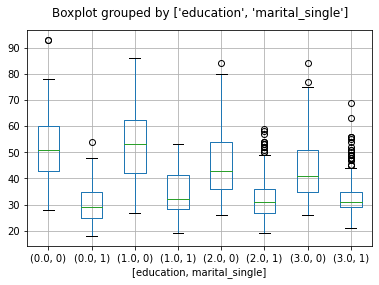

In [ ]:
# boxplot for age by education and single
df.boxplot(column='age', by=['education', 'marital_single'])
plt.title("")
plt.show()

In [ ]:
#pivot table
ptable = df.pivot_table(values='age', 
                        index='education',
                        columns='marital_single',  
                        aggfunc=np.median)
ptable

marital_single,0,1
education,,
0.0,51.0,29.0
1.0,53.0,32.0
2.0,43.0,31.0
3.0,41.0,31.0


In [ ]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['education'], x['marital_single']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [ ]:
df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
contact_telephone    0
contact_nan          0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
dtype: int64

## D. Rescaling Features

RobustScaler to transform the values in each column by subtracting the median and dividing by IQR





In [ ]:
robust_scaler = RobustScaler()
df[['age','balance',
         'pdays','previous']] = robust_scaler.fit_transform(df[['age','balance',
                                                                     'pdays','previous']])

In [ ]:
df.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan,contact_telephone,contact_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.207583,2.129500,0.597826,13.851500,5.002500,292.020500,1.909500,-0.080479,0.280750,0.149000,0.02250,0.017500,0.230500,0.081000,0.032000,0.082500,0.04800,0.174000,0.034500,0.005000,0.073500,0.222000,0.227000,0.073000,0.095500,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000
std,0.705435,0.801281,2.169941,9.712189,3.079974,221.557295,1.378862,0.751807,1.700368,0.356178,0.14834,0.131158,0.421258,0.272903,0.176044,0.275194,0.21382,0.379204,0.182555,0.070551,0.261021,0.415695,0.418997,0.260202,0.293978,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125
min,-1.111111,0.000000,-1.060984,1.000000,1.000000,7.000000,1.000000,-1.044223,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,2.000000,-0.242204,5.000000,2.000000,146.000000,1.000000,-0.606277,-0.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,12.000000,5.000000,236.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.666667,3.000000,0.757796,23.000000,7.000000,379.000000,2.000000,0.393723,0.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.055556,3.000000,55.892585,31.000000,12.000000,1823.000000,11.000000,3.834522,26.500000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## E. Treatment of Outliers
Log Transformation on age and balance which was the focus of my first etivity.
Plotted histograms of before and after dealing with outliers.

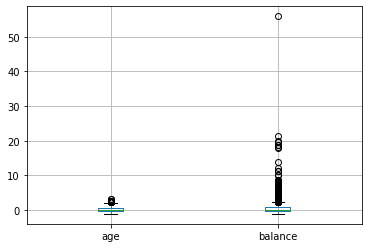

In [ ]:
df.boxplot(column=['age','balance'])
plt.show()

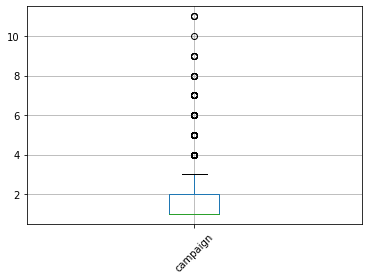

In [ ]:
df.boxplot(column=['campaign'], rot=45)
plt.title("")
plt.show()

In [ ]:
df['campaign'].value_counts()

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1
Name: campaign, dtype: int64

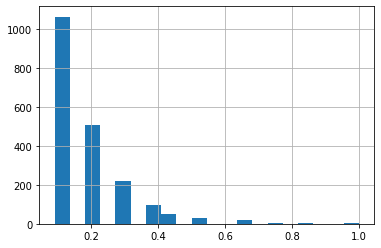

In [ ]:
df['campaign'] = df['campaign']/11
df['campaign'].hist(bins=20)
plt.show()

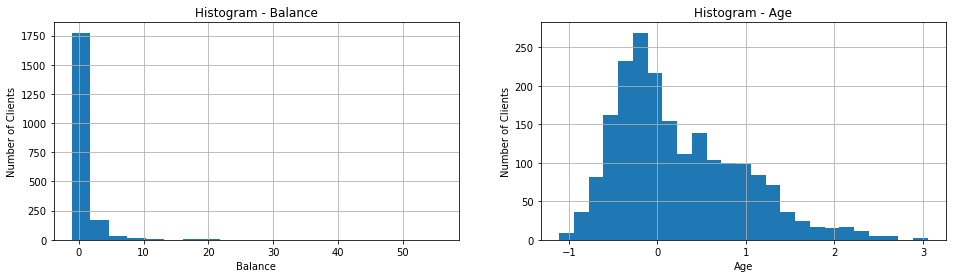

In [ ]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Balance
ax3= fig.add_subplot(1, 2, 1)
ax3.set_title("Histogram - Balance")
ax3.set_ylabel('Number of Clients')
ax3.set_xlabel('Balance')
df['balance'].hist(bins=20)

# age
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Histogram - Age")
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Clients')
df['age'].hist(bins=25)

plt.show()

In [ ]:
df[['balance', 'age' ]].min()

balance   -1.060984
age       -1.111111
dtype: float64

In [ ]:
df[['balance', 'age']].max()

balance    55.892585
age         3.055556
dtype: float64

In [ ]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.75)
df['age'] = np.log(df['age']+2.26)

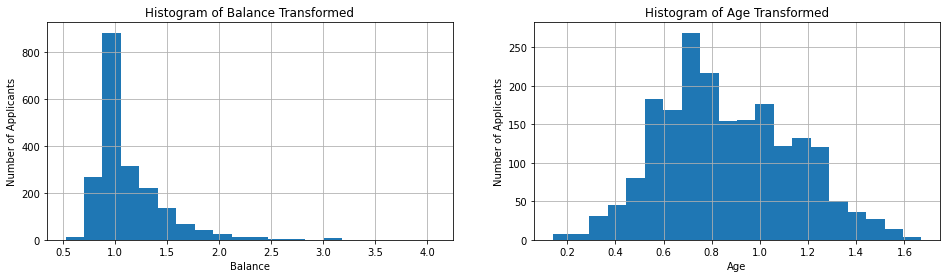

In [ ]:

fig = plt.figure(figsize=(16,4))

# Plot Balance
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance Transformed")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

# Plot Age
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Histogram of Age Transformed")
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Applicants')
df['age'].hist(bins=20)


plt.show()

## F. Creation of Derived Features
Show the cyclical nature of the months.
Create a new variable with balance and age called AgingBalance which is the sum of age and balance.
Create a new variable called DayAndMonth which is the sum of day and month of each applicant.
Features decided on by basing off etivity 1 and forum discussion 

In [ ]:
df['Sin_Month']=np.sin(2*np.pi*df['month']/max(df['month']))
df['Cos_Month']=np.cos(2*np.pi*df['month']/max(df['month']))

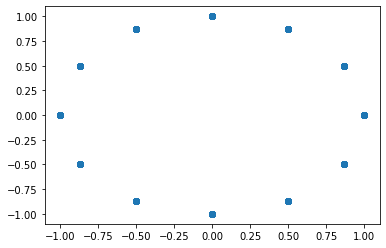

In [ ]:
plt.scatter(x=df['Sin_Month'],y=df['Cos_Month'])

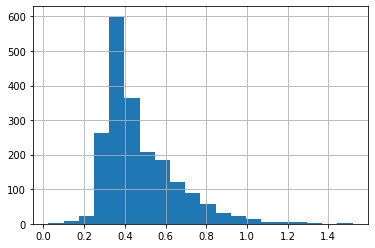

In [ ]:
np.log(df['balance']+.5).hist(bins=20)
plt.show()

In [ ]:
df['AgingBalance'] = original_df['age'] + original_df['balance']
df[['AgingBalance']] = robust_scaler.fit_transform(df[['AgingBalance']])
df[['AgingBalance']].min()

AgingBalance   -1.059027
dtype: float64

In [ ]:
df['AgingBalance'] = np.log(df['AgingBalance']+2.05)

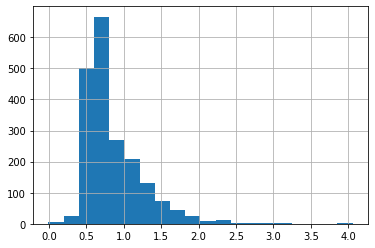

In [ ]:
df['AgingBalance'].hist(bins=20)
plt.show()

In [ ]:
df['DayAndMonth'] = df['day'] + df['month']
df[['DayAndMonth']] = robust_scaler.fit_transform(df[['DayAndMonth']])
df[['DayAndMonth']].min()

DayAndMonth   -0.736842
dtype: float64

In [ ]:
df['DayAndMonth'] = np.log(df['DayAndMonth']+3.5)

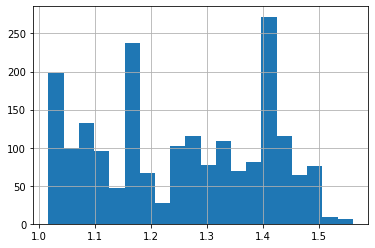

In [ ]:
df['DayAndMonth'].hist(bins=20)
plt.show()

In [ ]:
df.drop('day', axis=1, inplace=True)
df.drop('balance', axis=1, inplace=True)
df.head(100)

,age,education,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan,contact_telephone,contact_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,Sin_Month,Cos_Month,AgingBalance,DayAndMonth
0,0.655791,3.0,4,957,0.181818,-0.291013,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,8.660254e-01,-0.5,0.660676,1.035243
1,0.839650,2.0,4,233,0.181818,-0.279601,-0.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,8.660254e-01,-0.5,0.763558,1.035243
2,1.231588,2.0,4,126,0.181818,0.325250,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,8.660254e-01,-0.5,0.875472,1.035243
3,1.015231,2.0,4,274,0.090909,0.319544,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,8.660254e-01,-0.5,0.668158,1.035243
4,1.147050,2.0,4,479,0.090909,0.713267,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,8.660254e-01,-0.5,0.865032,1.035243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.565314,2.0,12,454,0.545455,0.097004,-0.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-2.449294e-16,1.0,0.662105,1.418660
96,0.952944,2.0,12,116,0.181818,0.114123,-0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-2.449294e-16,1.0,0.868234,1.456164
97,0.863359,2.0,12,94,0.454545,0.114123,7.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,-2.449294e-16,1.0,0.793750,1.456164
98,1.054699,2.0,12,385,0.636364,-0.291013,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-2.449294e-16,1.0,0.834244,1.456164


In [ ]:
df[['DayAndMonth', 'AgingBalance']].max()

DayAndMonth     1.560911
AgingBalance    4.059173
dtype: float64

In [ ]:
original_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,3.0,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no
1,39.0,technician,divorced,2.0,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no
2,59.0,retired,married,2.0,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no
3,47.0,blue-collar,married,2.0,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no
4,54.0,retired,married,2.0,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no


## G. Save the Prepared Dataset

In [ ]:
df.to_csv('bank_prepared.csv')